**Importing Libraries**

In [143]:
import itertools
import pandas as pd
from datasets import load_dataset

**Loading Dataset**

In [144]:


# Load the dataset


dataset = load_dataset("dair-ai/emotion", streaming=True)




In [145]:
from datasets import load_dataset
import pandas as pd
import itertools

# Load the dataset in streaming mode
dataset = load_dataset("dair-ai/emotion", streaming=True)
train_iter = dataset["train"]

# Convert full stream (16,000 samples) into a list
sample_list = list(itertools.islice(train_iter, 16000))  # now 16000 instead of 500

# Convert to DataFrame
train_df = pd.DataFrame(sample_list)

# Optional: Check shape
print(train_df.shape)
print(train_df.head())


(16000, 2)
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [146]:
print(train_df.head())


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [147]:
print(dataset["train"].features["label"].names)


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [148]:
label_names = dataset["train"].features["label"].names



In [149]:
train_df['emotion'] = train_df['label'].apply(lambda x: label_names[x])
print(train_df.head(20))

                                                 text  label   emotion
0                             i didnt feel humiliated      0   sadness
1   i can go from feeling so hopeless to so damned...      0   sadness
2    im grabbing a minute to post i feel greedy wrong      3     anger
3   i am ever feeling nostalgic about the fireplac...      2      love
4                                i am feeling grouchy      3     anger
5   ive been feeling a little burdened lately wasn...      0   sadness
6   ive been taking or milligrams or times recomme...      5  surprise
7   i feel as confused about life as a teenager or...      4      fear
8   i have been with petronas for years i feel tha...      1       joy
9                                 i feel romantic too      2      love
10  i feel like i have to make the suffering i m s...      0   sadness
11  i do feel that running is a divine experience ...      1       joy
12  i think it s the easiest time of year to feel ...      3     anger
13    

**Data Cleaning(Lowercase,Urls,HTML tags, punctuation,numbers,stopwords,extra spaces are removed)**

In [150]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
import re
import string

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Join back to cleaned string
    text = ' '.join(words)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [152]:

train_df['clean_text'] = train_df['text'].apply(clean_text)


In [153]:
print(train_df[['text', 'clean_text']].head(10))


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   
5  ive been feeling a little burdened lately wasn...   
6  ive been taking or milligrams or times recomme...   
7  i feel as confused about life as a teenager or...   
8  i have been with petronas for years i feel tha...   
9                                i feel romantic too   

                                          clean_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  
5      ive feeling little burdened lately wasnt sure 

**Data Preprocessing**

In [154]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label_encoded'] = label_encoder.fit_transform(train_df['label'])


In [155]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [156]:
print(train_df.head(10))

                                                text  label   emotion  \
0                            i didnt feel humiliated      0   sadness   
1  i can go from feeling so hopeless to so damned...      0   sadness   
2   im grabbing a minute to post i feel greedy wrong      3     anger   
3  i am ever feeling nostalgic about the fireplac...      2      love   
4                               i am feeling grouchy      3     anger   
5  ive been feeling a little burdened lately wasn...      0   sadness   
6  ive been taking or milligrams or times recomme...      5  surprise   
7  i feel as confused about life as a teenager or...      4      fear   
8  i have been with petronas for years i feel tha...      1       joy   
9                                i feel romantic too      2      love   

                                          clean_text  label_encoded  
0                              didnt feel humiliated              0  
1  go feeling hopeless damned hopeful around some...    

In [157]:
# Map label numbers to emotion names (based on dair-ai/emotion)
label_map = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise",
    6: "neutral"
}

# Apply mapping
train_df["emotion"] = train_df["label"].map(label_map)


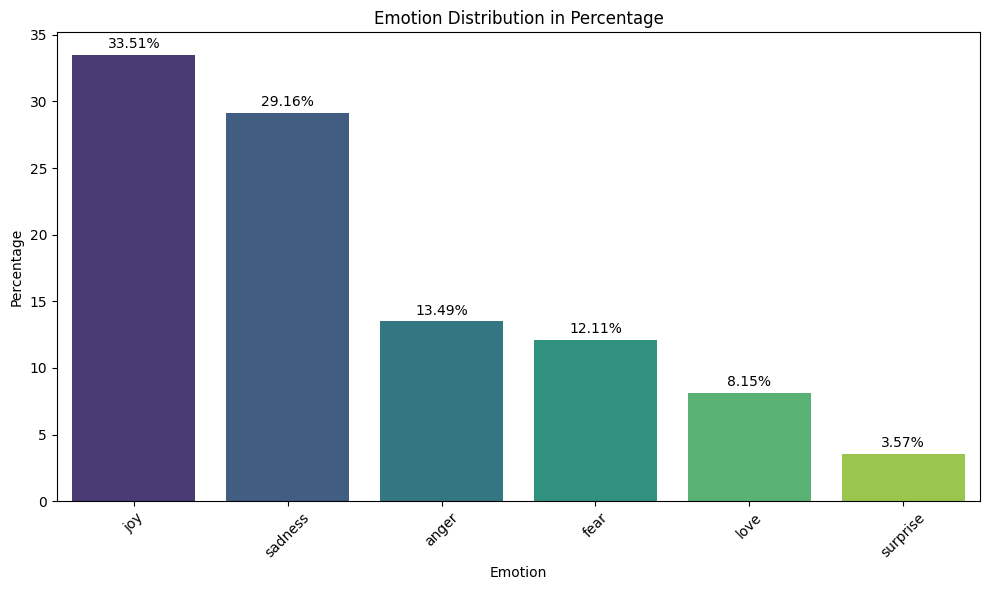

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage distribution
emotion_counts = train_df['emotion'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")

# Add percentage annotations on top of each bar
for i, val in enumerate(emotion_counts.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

plt.title('Emotion Distribution in Percentage')
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**MAJOR DATA IMBALANCE IS OBSERVED**

In [159]:
from sklearn.utils import resample

# Separate the classes to be downsampled
df_joy = train_df[train_df.emotion == "joy"]
df_sadness = train_df[train_df.emotion == "sadness"]

# Separate all other classes
df_other = train_df[~train_df.emotion.isin(["joy", "sadness"])]

# Calculate target number of samples per class
target_n = int(len(train_df['emotion']) / len(train_df['emotion'].unique()))

# Downsample 'joy' and 'sadness'
df_joy_downsampled = resample(df_joy, replace=False, n_samples=target_n, random_state=42)
df_sadness_downsampled = resample(df_sadness, replace=False, n_samples=target_n, random_state=42)

# Combine all
train_df_balanced = pd.concat([df_joy_downsampled, df_sadness_downsampled, df_other])

# Optional: shuffle the dataframe
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [160]:
df_surprise = train_df_balanced[train_df_balanced.emotion == "surprise"]
df_oversampled = resample(df_surprise,
                          replace=True,
                          n_samples=1000,
                          random_state=42)
train_df_balanced_2 = pd.concat([train_df_balanced, df_oversampled])


In [161]:
df_surprise = train_df_balanced_2[train_df_balanced.emotion == "love"]
df_oversampled = resample(df_surprise,
                          replace=True,
                          n_samples=1000,
                          random_state=42)
train_df_balanced_3 = pd.concat([train_df_balanced, df_oversampled])


C:\Users\user\AppData\Local\Temp\ipykernel_18876\55965780.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_surprise = train_df_balanced_2[train_df_balanced.emotion == "love"]


In [162]:
from sklearn.utils import resample

# Separate the classes to be downsampled
df_joy = train_df_balanced_3[train_df_balanced_3.emotion == "joy"]
df_sadness = train_df_balanced_3[train_df_balanced_3.emotion == "sadness"]

# Separate all other classes
df_other = train_df_balanced_3[~train_df_balanced_3.emotion.isin(["joy", "sadness"])]

# Calculate target number of samples per class
target_n = int(len(train_df_balanced_3['emotion']) / len(train_df_balanced_3['emotion'].unique()))

# Downsample 'joy' and 'sadness'
df_joy_downsampled = resample(df_joy, replace=False, n_samples=target_n, random_state=42)
df_sadness_downsampled = resample(df_sadness, replace=False, n_samples=target_n, random_state=42)

# Combine all
train_df_balanced_4 = pd.concat([df_joy_downsampled, df_sadness_downsampled, df_other])

# Optional: shuffle the dataframe
train_df_balanced_4 = train_df_balanced_4.sample(frac=1, random_state=42).reset_index(drop=True)


In [163]:
df_surprise = train_df_balanced_4[train_df_balanced_4.emotion == "surprise"]
df_oversampled = resample(df_surprise,
                          replace=True,
                          n_samples=1000,
                          random_state=42)
train_df_balanced_5 = pd.concat([train_df_balanced_4, df_oversampled])

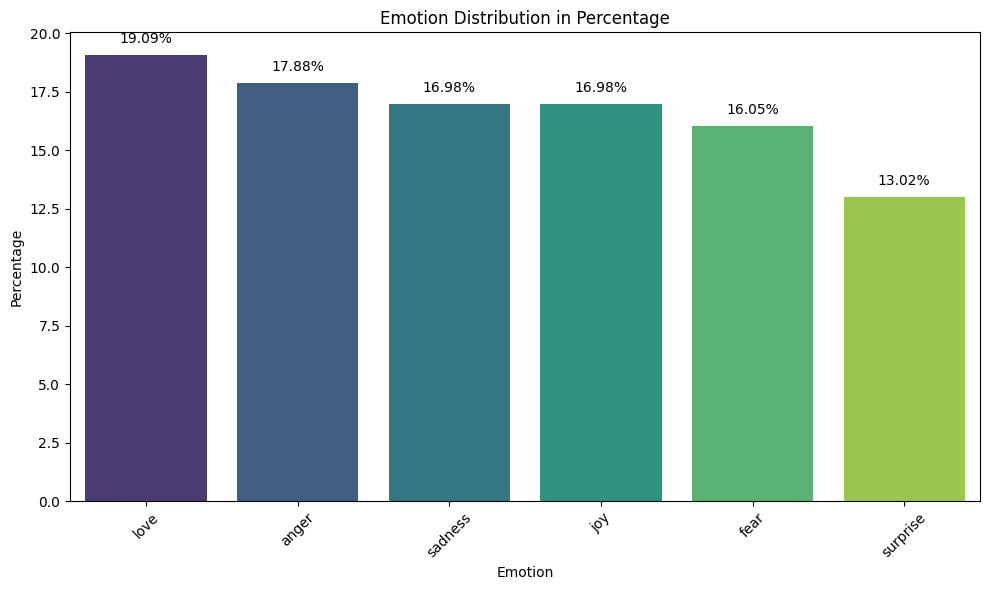

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage distribution
emotion_counts = train_df_balanced_5['emotion'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")

# Add percentage annotations on top of each bar
for i, val in enumerate(emotion_counts.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

plt.title('Emotion Distribution in Percentage')
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**After upsamplinng and downsampling minroity classes has been majored successfully**

In [165]:
# Check for missing labels
missing_labels = train_df_balanced_5[train_df_balanced_5['emotion'].isnull()]

# Show how many such samples exist
print(f"Number of texts with missing labels: {len(missing_labels)}")

# Optionally, display them
if not missing_labels.empty:
    display(missing_labels.head())


Number of texts with missing labels: 0


My current pipeline:

 Tokenization → words → integers

 Padding → fixed-length input

 Ready for → Embedding layer, which will automatically learn rich features from word indices.

In [166]:
from sklearn.model_selection import train_test_split

# Split into train and test
X = train_df_balanced_5['text']
y = train_df_balanced_5['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [167]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [168]:
print(X_train.shape)

(9657,)


In [169]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Save label names for later
label_names = le.classes_


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=10000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [171]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Baseline model
svm = LinearSVC(C=1.0, class_weight='balanced', max_iter=10000, random_state=42)
svm.fit(X_train_tfidf, y_train_enc)

# Evaluate
y_pred = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
#print("Classification Report:\n", classification_report(y_test_enc, y_pred, target_names=label_names))


Accuracy: 0.9287784679089027


**Performance Measure**

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 2, 5, 10]
}

grid = GridSearchCV(
    LinearSVC(class_weight='balanced', max_iter=10000),
    param_grid,
    scoring='f1_weighted',   # Good for multi-class
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_tfidf, y_train_enc)

# Best model
best_svm = grid.best_estimator_

# Evaluate
y_pred_best = best_svm.predict(X_test_tfidf)
print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_enc, y_pred_best))
#print("Classification Report:\n", classification_report(y_test_enc, y_pred_best, target_names=label_names))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best C: {'C': 0.5}
Accuracy: 0.9300207039337474


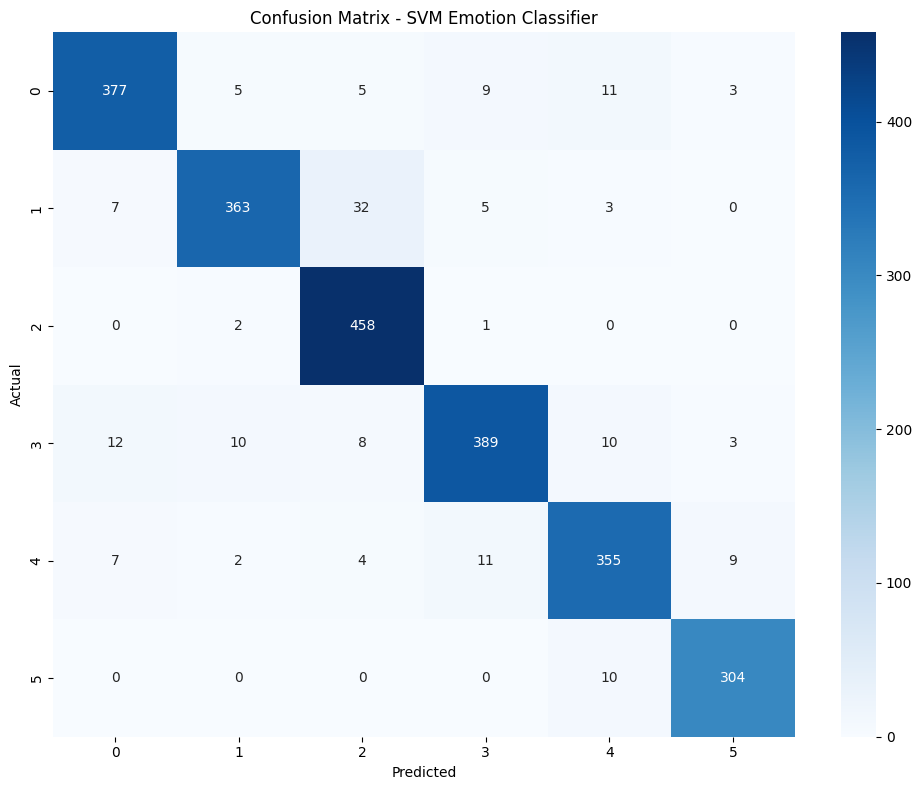

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_enc, y_pred_best)

# Plot
plt.figure(figsize=(10, 8))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#            xticklabels=label_names,          yticklabels=label_names)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Emotion Classifier')
plt.tight_layout()
plt.show()


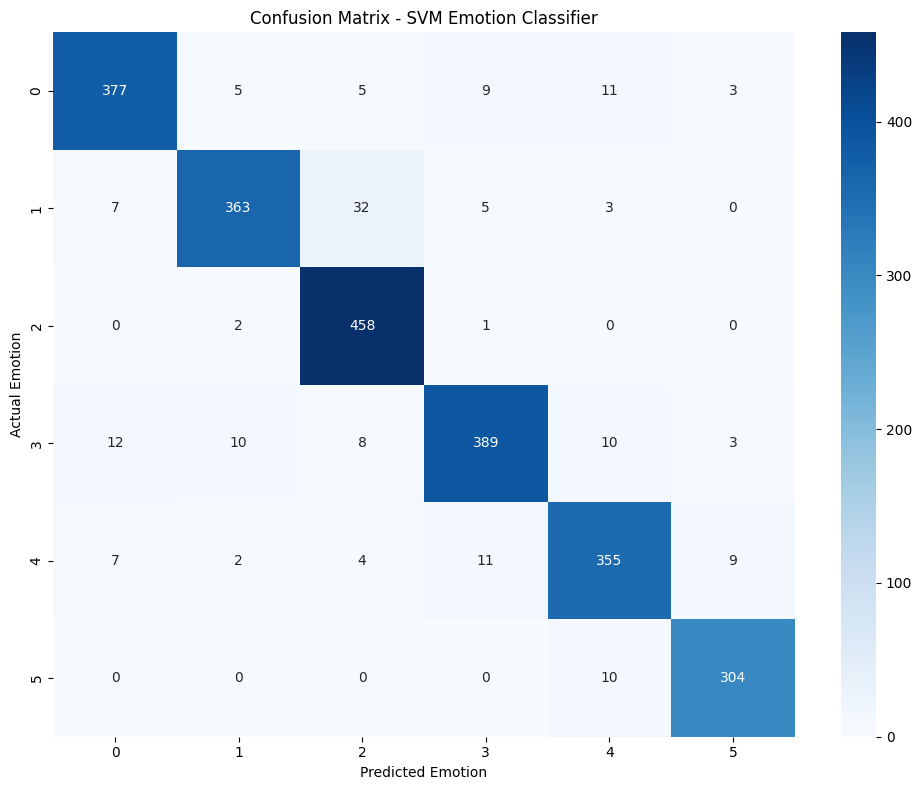

In [174]:
# Extract class (emotion) names from label encoder
label_names = le.classes_  # 'le' is your LabelEncoder instance

# Now plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_enc, y_pred_best)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.title('Confusion Matrix - SVM Emotion Classifier')
plt.tight_layout()
plt.show()



In [176]:
import joblib

# Save the model
joblib.dump(best_svm, 'svm_emotion_model.joblib')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# Save the label encoder
joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']